# Football Prediction Project
In this project, I am going to test how important home field advantage is in international football matches. Using different supervised machine learning algorithims, we will see the difference between each algorithims precision to accurately predict whether the home team won the game or not. In addition, there will be graphs to have a better visualization of the dataset.

###### **Alon Firestein**


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model, metrics
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("results.csv")

**A Quick Look At The Data:**

In [13]:
df.sample(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
2373,1942-01-14,Brazil,Chile,6,1,Copa América,Montevideo,Uruguay,True
5353,1963-03-31,Belgium,Yugoslavia,0,1,UEFA Euro qualification,Brussels,Belgium,False
5987,1965-10-17,Congo,Ghana,2,1,Friendly,Brazzaville,Congo,False
20538,1997-06-08,Finland,Azerbaijan,3,0,FIFA World Cup qualification,Helsinki,Finland,False
5913,1965-08-06,Cambodia,Indonesia,0,0,Friendly,P'yongyang,North Korea,True


## Learning About The Data:

**Getting to know the dataset more closely and making sure no data is null or duplicated.**

In [3]:
from pandas_profiling import ProfileReport
ProfileReport(df, title='Pandas Profiling Report', html={'style':{'full_width':True}})

## Changing and adding features to help the machine learning process:

In [19]:
df.loc[df['neutral']== False,'neutral'] = 0
df.loc[df['neutral']== True,'neutral'] = 1

In [20]:
df['winner'] = df['home_score']-df['away_score']
df.loc[df['winner'] == 0,'result'] = 0
df.loc[df['winner'] > 0,'result'] = 1
df.loc[df['winner'] < 0,'result'] = 2
df.loc[df['winner'] <= 0,'home_win?'] = 0
df.loc[df['winner'] > 0,'home_win?'] = 1
df['total_goals'] = df['home_score']+df['away_score']
df.drop(['winner'],axis=1)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result,home_win?,total_goals
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,0,0.0,0.0,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,0,1.0,1.0,6
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,0,1.0,1.0,3
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,0,0.0,0.0,4
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,0,1.0,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
41535,2019-11-19,Kyrgyzstan,Tajikistan,1,1,FIFA World Cup qualification,Bishkek,Kyrgyzstan,0,0.0,0.0,2
41536,2019-11-19,Vietnam,Thailand,0,0,FIFA World Cup qualification,Hanoi,Vietnam,0,0.0,0.0,0
41537,2019-11-19,Malaysia,Indonesia,2,0,FIFA World Cup qualification,Kuala Lumpur,Malaysia,0,1.0,1.0,2
41538,2019-11-19,Turkmenistan,Sri Lanka,2,0,FIFA World Cup qualification,Ashgabat,Turkmenistan,0,1.0,1.0,2


##### Features Description:

**date**: The official date in which the international match was played.

**home_team**: The national team which had the home advantage.

**away_team**: The national team which played on the road as the away team.

**home_score**: The score/amount of goals that the home team scored.

**away_score**: The score/amount of goals that the away team scored.

**tournament**: The type of game which was played which points out its importance. (eg: Friendly, World Cup, Euro, Qualifiers...etc)

**city**: The city in which the game was played.

**country**: The country in which the game was played.

**neutral**: Whether or not the game was played on neutral ground, therefore no team had home field advantage. (0- field is not neutral, 1- field is neutral)

**result**: The outcome of the game; (0- Tie Game, 1 - Home Team Won, 2 - Away Team Won)

**home_win?**: Whether the home team won the game; (0- Away team won or it was a draw, 1- Home team won)

**total_goals**: The total number of goals scored by both teams combined in the game.

## **Splitting the data - training & testing sets**
After splitting the data, I will start the machine learning process using supervised learning models.

In [21]:
X=df[['home_score','neutral']]
y=df['home_win?']
X_train, X_test, y_train, y_test = train_test_split(X, y)

# KNN:

**To find the most effiect K number:**

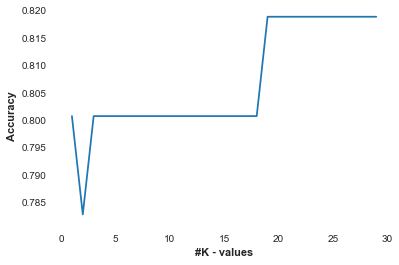

In [22]:
score_list=[]
for i in range(1,30):
    knnPlot=KNeighborsClassifier(n_neighbors=i)
    knnPlot.fit(X_train,y_train)
    score_list.append(knnPlot.score(X_test,y_test))

plt.plot(range(1,30),score_list)
plt.xlabel('#K - values', fontweight="bold")
plt.ylabel('Accuracy', fontweight="bold")
plt.show()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
knn=KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train,y_train)
print('KNN Accuracy :',knn.score(X_test,y_test),"\n")
kf = KFold(n_splits=5,shuffle=True, random_state=123)
cv_scores = cross_val_score(knn,X_train,y_train,cv=kf)
print("Cross Validation Scores:", cv_scores)
print("Cross Validation Scores Mean:", cv_scores.mean(),"\n")
y_pred = knn.predict(X_test)
y_true = y_test
cm_knn = confusion_matrix(y_true,y_pred)
print("KNN Matrix:")
print(cm_knn,"\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

KNN Accuracy : 0.817043813192104 

Cross Validation Scores: [0.81880918 0.76344086 0.7496389  0.81688333 0.81688333]
Cross Validation Scores Mean: 0.7931311186005456 

KNN Matrix:
[[4552  830]
 [1070 3933]] 

Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83      5382
         1.0       0.83      0.79      0.81      5003

    accuracy                           0.82     10385
   macro avg       0.82      0.82      0.82     10385
weighted avg       0.82      0.82      0.82     10385



# Logistic Regression:

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
lgr=LogisticRegression()
lgr.fit(X_train,y_train)
print('Logistic Regression Accuracy :', lgr.score(X_test,y_test),"\n")
kf = KFold(n_splits=5,shuffle=True, random_state=123)
cv_scores = cross_val_score(lgr,X_train,y_train,cv=kf)
print("Cross Validation Scores:", cv_scores)
print("Cross Validation Scores Mean:", cv_scores.mean(),"\n")
y_pred = lgr.predict(X_test)
y_true = y_test
cm_lgr = confusion_matrix(y_true,y_pred)
print("Logistic Regression Matrix:")
print(cm_lgr,"\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy : 0.8213769860375542 

Cross Validation Scores: [0.81014283 0.8159204  0.81784625 0.81575991 0.82538918]
Cross Validation Scores Mean: 0.817011715615471 

Logistic Regression Matrix:
[[4481  814]
 [1041 4049]] 

Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83      5295
         1.0       0.83      0.80      0.81      5090

    accuracy                           0.82     10385
   macro avg       0.82      0.82      0.82     10385
weighted avg       0.82      0.82      0.82     10385



# Naive Bayes:

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
nb=GaussianNB()
nb.fit(X_train,y_train)
print('Naive Bayes Accuracy : ', nb.score(X_test,y_test),"\n")
kf = KFold(n_splits=5,shuffle=True, random_state=123)
cv_scores = cross_val_score(nb,X_train,y_train,cv=kf)
print("Cross Validation Scores:", cv_scores)
print("Cross Validation Scores Mean:", cv_scores.mean(),"\n")
y_pred = nb.predict(X_test)
y_true = y_test
cm_nb = confusion_matrix(y_true,y_pred)
print("Naive Bayes Matrix:")
print(cm_nb,"\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Naive Bayes Accuracy :  0.8003851709195956 

Cross Validation Scores: [0.80516771 0.80564917 0.80436527 0.79489649 0.80613064]
Cross Validation Scores Mean: 0.8032418552399294 

Naive Bayes Matrix:
[[4601  628]
 [1445 3711]] 

Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.88      0.82      5229
         1.0       0.86      0.72      0.78      5156

    accuracy                           0.80     10385
   macro avg       0.81      0.80      0.80     10385
weighted avg       0.81      0.80      0.80     10385



# Decision Tree:

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
print('Decision Tree Accuracy : ', nb.score(X_test,y_test),"\n")
kf = KFold(n_splits=5,shuffle=True, random_state=123)
cv_scores = cross_val_score(dt,X_train,y_train,cv=kf)
print("Cross Validation Scores:", cv_scores)
print("Cross Validation Scores Mean:", cv_scores.mean(),"\n")
y_pred = dt.predict(X_test)
y_true = y_test
cm_dt = confusion_matrix(y_true,y_pred)
print("Decision Tree Matrix:")
print(cm_dt,"\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Decision Tree Accuracy :  0.8074145402022147 

Cross Validation Scores: [0.81559942 0.81768576 0.81463649 0.81864869 0.81656235]
Cross Validation Scores Mean: 0.8166265446958754 

Decision Tree Matrix:
[[4568  797]
 [1046 3974]] 

Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83      5365
         1.0       0.83      0.79      0.81      5020

    accuracy                           0.82     10385
   macro avg       0.82      0.82      0.82     10385
weighted avg       0.82      0.82      0.82     10385



# Random Forest:

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
print('Random Forest Accuracy : ', rf.score(X_test,y_test),"\n")
kf = KFold(n_splits=5,shuffle=True, random_state=123)
cv_scores = cross_val_score(rf,X_train,y_train,cv=kf)
print("Cross Validation Scores:", cv_scores)
print("Cross Validation Scores Mean:", cv_scores.mean(),"\n")
y_pred = rf.predict(X_test)
y_true = y_test
cm_rf = confusion_matrix(y_true,y_pred)
print("Random Forest Matrix:")
print(cm_rf,"\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Random Forest Accuracy :  0.8183919114106885 

Cross Validation Scores: [0.81656235 0.8225004  0.81351308 0.81736479 0.82009308]
Cross Validation Scores Mean: 0.8180067404910929 

Random Forest Matrix:
[[4512  815]
 [1071 3987]] 

Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83      5327
         1.0       0.83      0.79      0.81      5058

    accuracy                           0.82     10385
   macro avg       0.82      0.82      0.82     10385
weighted avg       0.82      0.82      0.82     10385



# AdaBoost:

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
adb= AdaBoostClassifier(n_estimators=100, random_state=42)
adb.fit(X,y)
print("AdaBoost Accuaracy:",adb.score(X,y),"\n")
kf = KFold(n_splits=5,shuffle=True, random_state=123)
cv_scores = cross_val_score(adb,X_train,y_train,cv=kf)
print("Cross Validation Scores:", cv_scores)
print("Cross Validation Scores Mean:", cv_scores.mean(),"\n")
y_pred = adb.predict(X_test)
y_true = y_test
cm_adb = confusion_matrix(y_true,y_pred)
print("Random Forest Matrix:")
print(cm_adb,"\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

AdaBoost Accuaracy: 0.8181030332209918 

Cross Validation Scores: [0.81624137 0.81913016 0.81816723 0.81977211 0.81832772]
Cross Validation Scores Mean: 0.8183277162574225 

Random Forest Matrix:
[[4455  792]
 [1104 4034]] 

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.85      0.82      5247
         1.0       0.84      0.79      0.81      5138

    accuracy                           0.82     10385
   macro avg       0.82      0.82      0.82     10385
weighted avg       0.82      0.82      0.82     10385



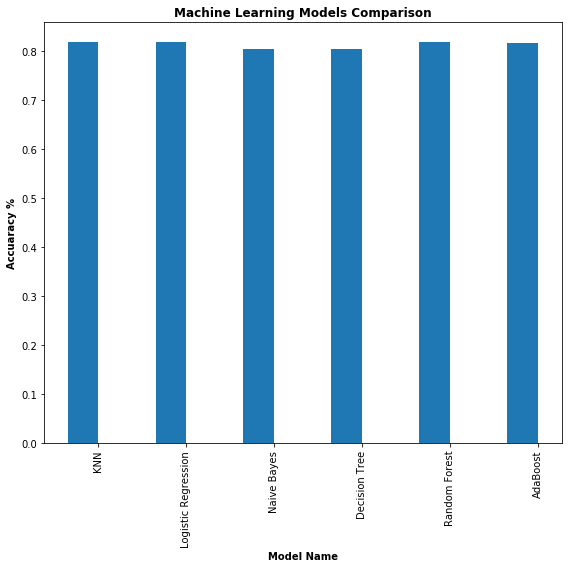

In [58]:
labels = ['KNN', 'Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'AdaBoost']
model_avgs = [knn.score(X_test,y_test), lgr.score(X_test,y_test), nb.score(X_test,y_test), nb.score(X_test,y_test),rf.score(X_test,y_test), adb.score(X,y)]
width = 0.35
x = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(8,8))
ax.bar(x - width/2, model_avgs, width)
ax.set_title('Machine Learning Models Comparison', fontweight="bold")
ax.set_xlabel('Model Name', fontweight="bold")
ax.set_ylabel('Accuaracy %', fontweight="bold")
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Some Data Visualization:

Text(0.5, 0, 'Outcome?')

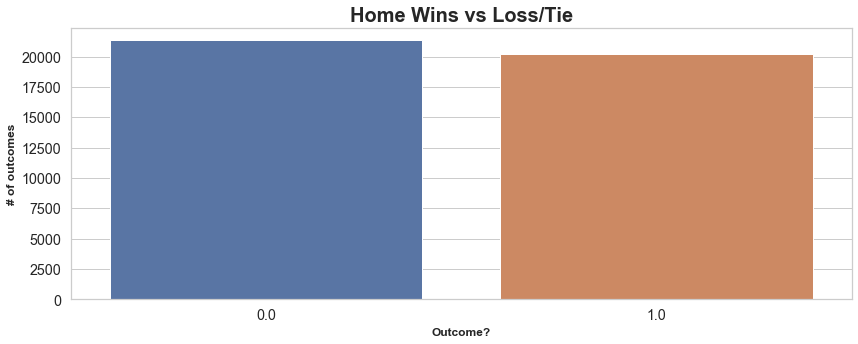

In [526]:
plt.figure(figsize=(14,5))
sns.countplot(x = df['home_win?'], data=df)
plt.title('Home Wins vs Loss/Tie', fontsize=20, fontweight="bold")
plt.ylabel('# of outcomes', fontsize=12, fontweight="bold")
plt.xlabel('Outcome?', fontsize=12, fontweight="bold")

Tie Game Outcome Precentage:  0.23047664901299955
# of Tie Results:  9574 

Home Team Success Precentage:  0.486519017814155
# of Home Wins:  8441 

Away Team Success Precentage:  0.2830043331728455
# of Away Wins:  5316


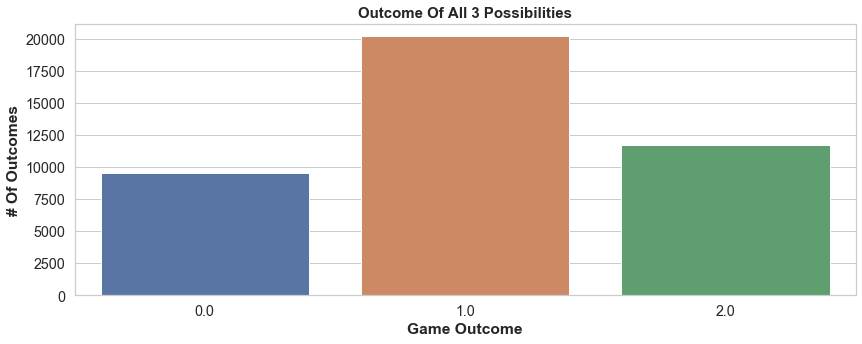

In [517]:
tie_result_pct = (df['result']==0)/ (df['result'].value_counts().sum())
home_winner_pct = (df['result']==1)/ (df['result'].value_counts().sum())
away_winner_pct = (df['result']==2)/ (df['result'].value_counts().sum())
tie_result = (df['result']==0).value_counts()
home_winner = (df['result']==1).value_counts()
away_winner = (df['result']==2).value_counts()
print("Tie Game Outcome Precentage: ", tie_result_pct.sum())
print("# of Tie Results: ", (df['winner']==0).sum(),"\n")
print("Home Team Success Precentage: ", home_winner_pct.sum())
print("# of Home Wins: ", (df['winner']==1).sum(),"\n")
print("Away Team Success Precentage: ", away_winner_pct.sum())
print("# of Away Wins: ", (df['winner']==2).sum())
plt.figure(figsize=(14,5))
sns.countplot(df['result'])
plt.title('Outcome Of All 3 Possibilities', fontsize = 15, fontweight="bold")
plt.xlabel('Game Outcome', fontweight="bold")
plt.ylabel('# Of Outcomes', fontweight="bold")
plt.show()

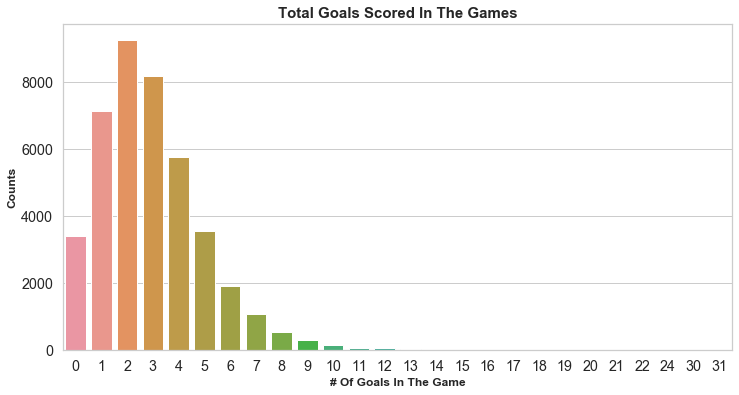

In [518]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x=df['total_goals'], data=df)
ax.set_title("Total Goals Scored In The Games", fontsize=15, fontweight="bold")
ax.set_xlabel("# Of Goals In The Game", fontsize=12, fontweight="bold")
ax.set_ylabel("Counts", fontsize=12, fontweight="bold")
plt.show()

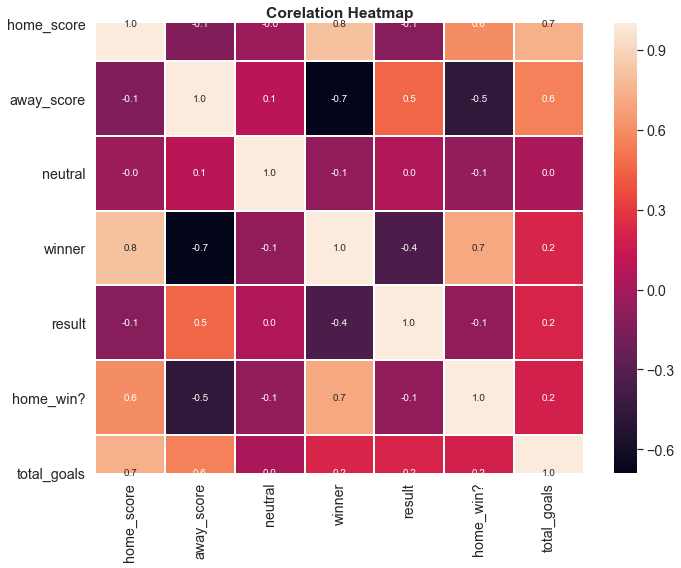

In [519]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),linewidths=1, annot=True,fmt= '.1f')
plt.title('Corelation Heatmap', fontweight="bold")
plt.tight_layout()
plt.show()

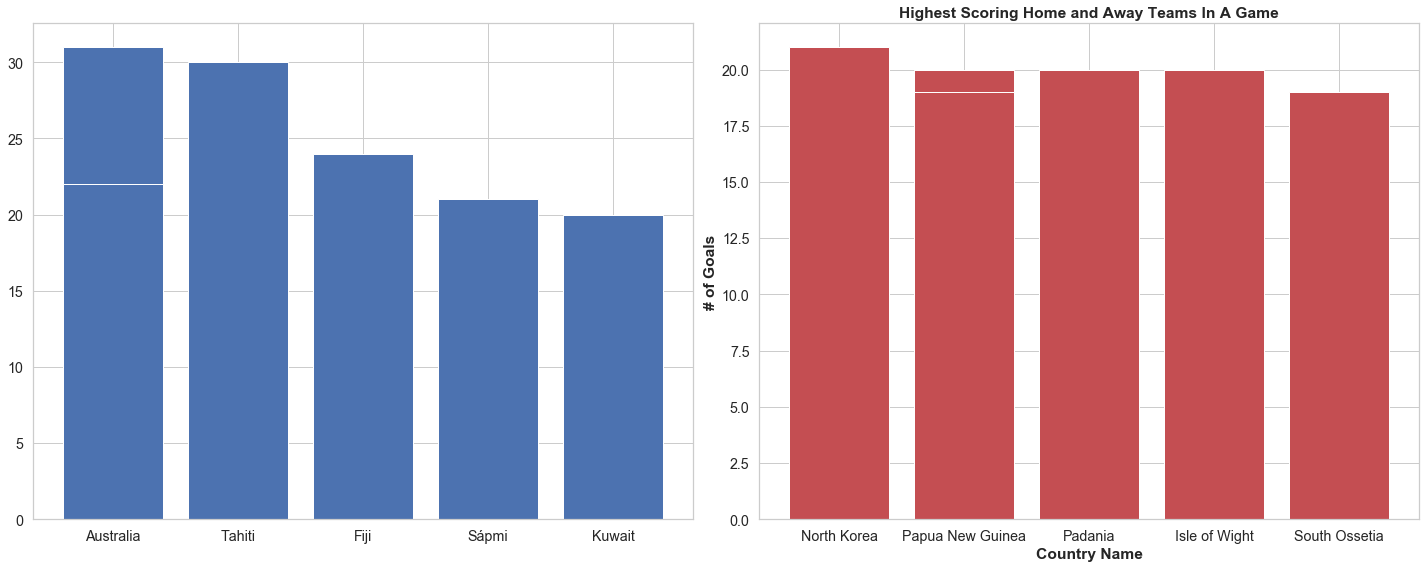

In [520]:
top5home = df.sort_values("home_score", ascending = False)[:6]
top5away = df.sort_values("away_score", ascending = False)[:6]
plt.figure(figsize=(30,8))
plt.subplot(131)
plt.bar(top5home['home_team'], top5home['home_score'], color = 'b')
plt.subplot(132)
plt.bar(top5away['away_team'], top5away['away_score'], color = 'r')
plt.title('Highest Scoring Home and Away Teams In A Game', fontweight="bold")
plt.ylabel("# of Goals", fontweight="bold")
plt.xlabel("Country Name", fontweight="bold")
plt.tight_layout()
plt.show()

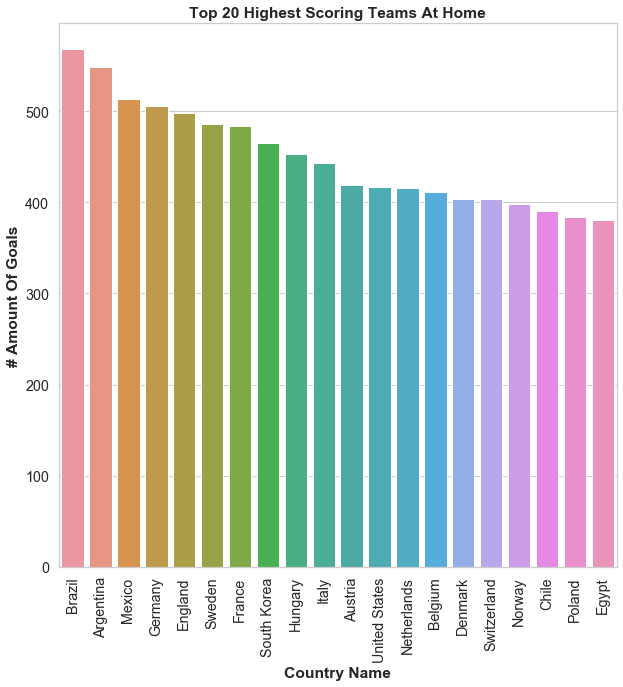

In [521]:
HomeTeams=pd.DataFrame(df.groupby('home_team')['home_score'].count().index)
HomeScores=pd.DataFrame(df.groupby('home_team')['home_score'].count().values,columns=['Score'])
Combined=pd.concat([HomeTeams,HomeScores],axis=1)
plt.figure(figsize=(10,10))
Combined=Combined.sort_values(by='Score',ascending=False)
sns.barplot(x=Combined.home_team[:20],y=Combined.Score[:20])
plt.xticks(rotation=90)
plt.title("Top 20 Highest Scoring Teams At Home", fontweight="bold")
plt.ylabel("# Amount Of Goals", fontweight="bold")
plt.xlabel("Country Name", fontweight="bold")
plt.show()

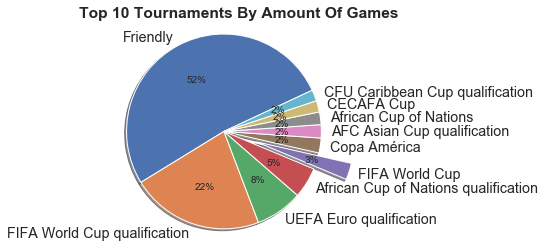

In [522]:
tournament=df['tournament'].value_counts()[:10]
names=tournament.index
values=tournament.values
fig, ax = plt.subplots()
explode = (0, 0, 0, 0, 0.35, 0, 0, 0, 0, 0)
ax.pie(values, labels=names, autopct='%1.0f%%', shadow = True, explode = explode, startangle=25)
plt.axis('equal')
plt.title("Top 10 Tournaments By Amount Of Games", fontweight="bold")
plt.show()

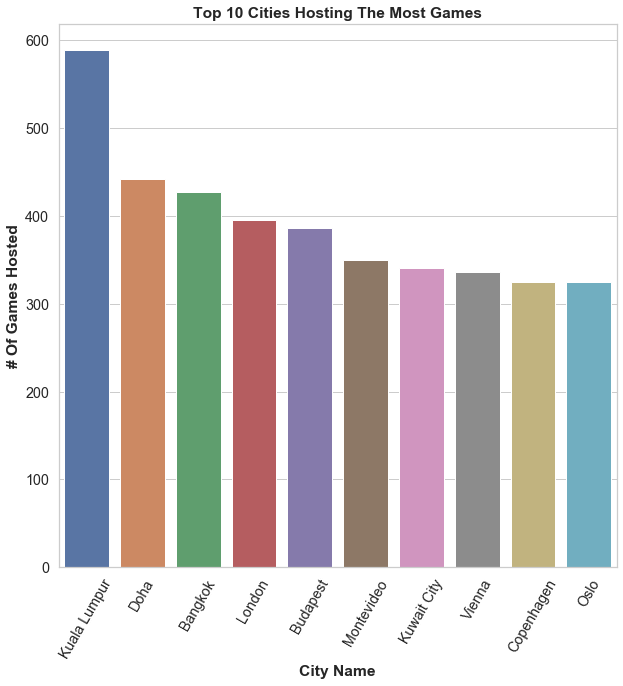

In [523]:
MostGames=df.city.value_counts()
MostGames=MostGames.head(10)
plt.figure(figsize=(10,10))
ax=sns.barplot(x=MostGames.index,y=MostGames.values)
plt.title('Top 10 Cities Hosting The Most Games', fontweight="bold")
plt.xlabel('City Name', fontweight="bold")
plt.ylabel('# Of Games Hosted', fontweight="bold")
plt.xticks(rotation=60)
plt.show()

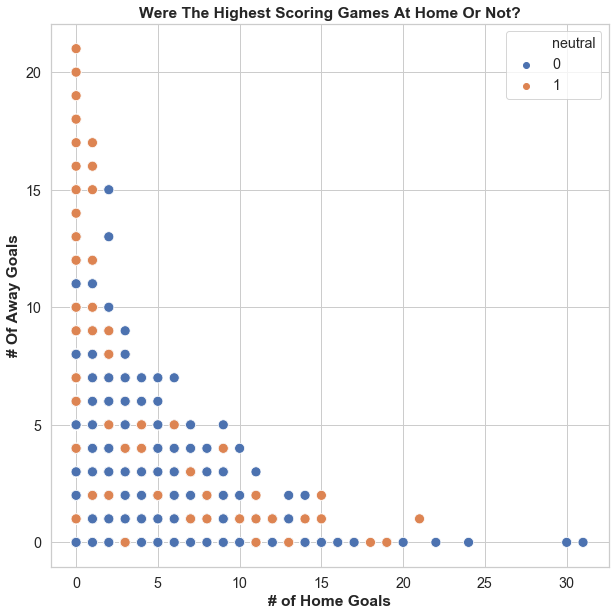

In [528]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="home_score", y="away_score",
                hue="neutral",data=df, s=100, marker = 'o')
plt.title('Were The Highest Scoring Games At Home Or Not?', fontweight="bold")
plt.xlabel('# of Home Goals', fontweight="bold")
plt.ylabel('# Of Away Goals', fontweight="bold")
plt.show()